In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold

In [2]:
np.random.seed(0)

In [3]:
# Dog data
dog_whisker_length = np.random.normal(5, 1, 10)  # Mean=5, Std=1, Size=10
dog_ear_flappiness = np.random.normal(8, 1, 10)  # Mean=8, Std=1, Size=10

# Cat data
cat_whisker_length = np.random.normal(8, 1, 10)  # Mean=8, Std=1, Size=10
cat_ear_flappiness = np.random.normal(5, 1, 10)  # Mean=5, Std=1, Size=10

In [4]:
# Stack data
dogs_data = np.vstack((dog_whisker_length, dog_ear_flappiness)).T
cats_data = np.vstack((cat_whisker_length, cat_ear_flappiness)).T
 
# Combine data and labels
X = np.vstack((dogs_data, cats_data))
y = np.hstack((np.zeros(10), np.ones(10)))  # Dogs=0, Cats=1

# Split into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [5]:
def cross_validation_kfold(X_train, y_train, k_values, d):
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    avg_errors = []
    
    for k in k_values:
        errors = []
        for train_idx, val_idx in kf.split(X_train):
            X_tr, X_val = X_train[train_idx], X_train[val_idx]
            y_tr, y_val = y_train[train_idx], y_train[val_idx]
            
            dog_data = X_tr[y_tr == 0]
            cat_data = X_tr[y_tr == 1]
            
            theta, theta_not, _ = random_linear_classifier(dog_data, cat_data, k, d)
            
            val_error = 0
            for i in range(len(X_val)):
                pred = np.dot(theta, X_val[i]) + theta_not
                if (y_val[i] == 0 and pred < 0) or (y_val[i] == 1 and pred > 0):
                    val_error += 1
            errors.append(val_error / len(X_val))
        
        avg_errors.append(np.mean(errors))
    
    best_k = k_values[np.argmin(avg_errors)]
    return best_k

# Test different k values
k_values = [1, 10, 50, 100, 200, 350]
best_k = cross_validation_kfold(X_train, y_train, k_values, d=2)
print("Best k:", best_k)

NameError: name 'random_linear_classifier' is not defined

In [6]:
def random_linear_classifier(dog_data, cat_data, k, d):
    best_error = float('inf')
    best_theta = None
    best_theta_not = None
    
    for _ in range(k):
        theta = np.random.normal(0, 1, d)
        theta_not = np.random.normal(0, 1)
        
        error = compute_error(theta, theta_not, dog_data, cat_data)
        
        if error < best_error:
            best_error = error
            best_theta = theta
            best_theta_not = theta_not
            
    return best_theta, best_theta_not, best_error

def compute_error(theta, theta_not, dog_data, cat_data):
    error = 0
    for i in range(len(dog_data)):
        if np.dot(theta, dog_data[i]) + theta_not < 0:
            error += 1
    for i in range(len(cat_data)):
        if np.dot(theta, cat_data[i]) + theta_not > 0:
            error += 1
    return error

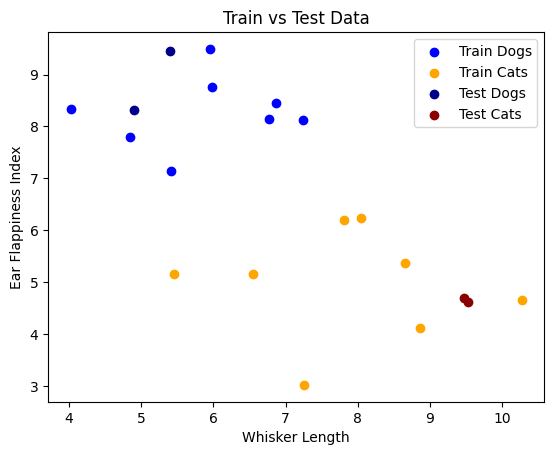

In [7]:
# Extract training and testing points
train_dogs = X_train[y_train == 0]
train_cats = X_train[y_train == 1]
test_dogs = X_test[y_test == 0]
test_cats = X_test[y_test == 1]

plt.scatter(train_dogs[:, 0], train_dogs[:, 1], label='Train Dogs', c='blue')
plt.scatter(train_cats[:, 0], train_cats[:, 1], label='Train Cats', c='orange')
plt.scatter(test_dogs[:, 0], test_dogs[:, 1], label='Test Dogs', c='darkblue')
plt.scatter(test_cats[:, 0], test_cats[:, 1], label='Test Cats', c='darkred')
plt.xlabel('Whisker Length')
plt.ylabel('Ear Flappiness Index')
plt.title('Train vs Test Data')
plt.legend()
plt.show()

In [8]:
def random_linear_classifier(dog_data, cat_data, k, d):
    best_error = float('inf')
    best_theta = None
    best_theta_not = None
    
    for _ in range(k):
        theta = np.random.normal(0, 1, d)
        theta_not = np.random.normal(0, 1)
        
        error = compute_error(theta, theta_not, dog_data, cat_data)
        
        if error < best_error:
            best_error = error
            best_theta = theta
            best_theta_not = theta_not
            
    return best_theta, best_theta_not, best_error

def compute_error(theta, theta_not, dog_data, cat_data):
    error = 0
    for i in range(len(dog_data)):
        if np.dot(theta, dog_data[i]) + theta_not < 0:
            error += 1
    for i in range(len(cat_data)):
        if np.dot(theta, cat_data[i]) + theta_not > 0:
            error += 1
    return error

In [9]:
def cross_validation_kfold(X_train, y_train, k_values, d):
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    avg_errors = []
    
    for k in k_values:
        errors = []
        for train_idx, val_idx in kf.split(X_train):
            X_tr, X_val = X_train[train_idx], X_train[val_idx]
            y_tr, y_val = y_train[train_idx], y_train[val_idx]
            
            dog_data = X_tr[y_tr == 0]
            cat_data = X_tr[y_tr == 1]
            
            theta, theta_not, _ = random_linear_classifier(dog_data, cat_data, k, d)
            
            val_error = 0
            for i in range(len(X_val)):
                pred = np.dot(theta, X_val[i]) + theta_not
                if (y_val[i] == 0 and pred < 0) or (y_val[i] == 1 and pred > 0):
                    val_error += 1
            errors.append(val_error / len(X_val))
        
        avg_errors.append(np.mean(errors))
    
    best_k = k_values[np.argmin(avg_errors)]
    return best_k

# Test different k values
k_values = [1, 10, 50, 100, 200, 350]
best_k = cross_validation_kfold(X_train, y_train, k_values, d=2)
print("Best k:", best_k)

Best k: 100


In [10]:
# Run classifier on training data with best k
dog_data = X_train[y_train == 0]
cat_data = X_train[y_train == 1]
best_theta, best_theta_not, train_error = random_linear_classifier(dog_data, cat_data, best_k, d=2)

# Compute test error
test_error = 0
predictions = []
for i in range(len(X_test)):
    pred = np.dot(best_theta, X_test[i]) + best_theta_not
    predictions.append(1 if pred > 0 else 0)
    if (y_test[i] == 0 and pred < 0) or (y_test[i] == 1 and pred > 0):
        test_error += 1

print("Training Error:", train_error / len(X_train))
print("Testing Error:", test_error / len(X_test))

Training Error: 0.0
Testing Error: 0.0


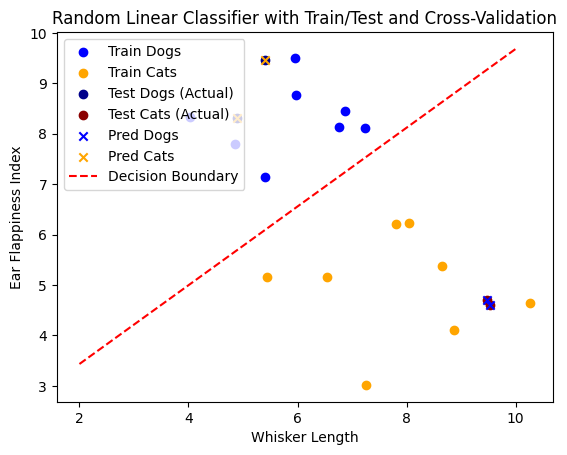

In [11]:
# Decision boundary
x1 = np.linspace(2, 10, 100)
x2 = -(best_theta[0] * x1 + best_theta_not) / best_theta[1]

# Plot training data
plt.scatter(train_dogs[:, 0], train_dogs[:, 1], label='Train Dogs', c='blue')
plt.scatter(train_cats[:, 0], train_cats[:, 1], label='Train Cats', c='orange')

# Plot test data (actual)
plt.scatter(test_dogs[:, 0], test_dogs[:, 1], label='Test Dogs (Actual)', c='darkblue', marker='o')
plt.scatter(test_cats[:, 0], test_cats[:, 1], label='Test Cats (Actual)', c='darkred', marker='o')

# Plot test predictions
pred_dogs = X_test[np.array(predictions) == 0]
pred_cats = X_test[np.array(predictions) == 1]
plt.scatter(pred_dogs[:, 0], pred_dogs[:, 1], label='Pred Dogs', c='blue', marker='x')
plt.scatter(pred_cats[:, 0], pred_cats[:, 1], label='Pred Cats', c='orange', marker='x')

plt.plot(x1, x2, 'r--', label='Decision Boundary')
plt.xlabel('Whisker Length')
plt.ylabel('Ear Flappiness Index')
plt.title('Random Linear Classifier with Train/Test and Cross-Validation')
plt.legend()
plt.show()